In [ ]:
!pip install pyrdf2vec matplotlib seaborn scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 40.4 MB/s eta 0:00:00
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp310-cp310-linux_x86_64.whl si

In [ ]:
!pip install rdflib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.6 MB/s eta 0:00:00


In [ ]:
from pyrdf2vec import RDF2VecTransformer
from pyrdf2vec.graphs import KG
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from rdflib import Graph

g = Graph()

try:
    # Попытка загрузить файл, указав формат, если автоопределение не работает
    g.parse("/content/result.owl", format="turtle",)
    print(f"Файл успешно загружен. Граф содержит {len(g)} триплетов.")
except Exception as e:
    print(f"Ошибка при загрузке файла: {e}")

Файл успешно загружен. Граф содержит 23370 триплетов.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


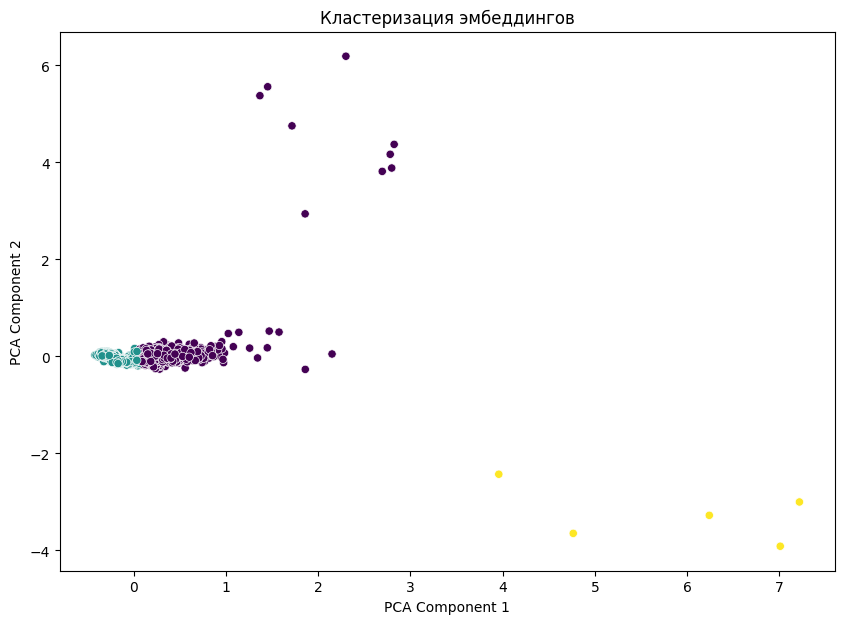

In [ ]:
from pyrdf2vec import RDF2VecTransformer
from pyrdf2vec.graphs import KG
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


g.serialize(destination="output_graph.turtle", format="turtle")


kg = KG(location="output_graph.turtle")

transformer = RDF2VecTransformer()
unique_subjects = set(g.subjects())
entities = [str(subject) for subject in unique_subjects]

embeddings = transformer.fit_transform(kg, entities)

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)

clusters = kmeans.fit_predict(embeddings[0])

pca = PCA(n_components=10)
reduced_embeddings = pca.fit_transform(embeddings[0])

# Визуализация кластеров
plt.figure(figsize=(10, 7))
sns.scatterplot(x=reduced_embeddings[:, 0], y=reduced_embeddings[:, 1], hue=clusters, palette="viridis", legend=None)
plt.title('Кластеризация эмбеддингов')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()